In [2]:
%cd -q D:\data\progr\audio_widener\pycharm_proj
%load_ext autoreload
!pip install jedi==0.17.2
%autoreload 2
from imports import *

sound1, sound2 = guitar_wd1, guitar_wd2

# sound = electro_sample
sound = guitar_sample
# sound1, sound2 = electro_sample, electro_sample
# sound1 = sound2 = np.sin(np.linspace(0, 3000, sample_rate) * 20) + np.sin(np.linspace(0, 3000, sample_rate) * 8)

# corellation, coherence

NameError: name 'split_into_bands_by_parts' is not defined

In [13]:
Audio(song, rate=sample_rate, autoplay=False, normalize=True)

In [9]:
Audio([sound1, sound2], rate=guitar_sample_rate, autoplay=True, normalize=True)

In [ ]:
Sxx, drawing_params = create_spectrogram(sound1, sample_rate, "angle")
Sxx2, drawing_params = create_spectrogram(sound1, sample_rate, "magnitude")

fig, Sxx = create_spectrogram_figure(Sxx, drawing_params, title="Phase", colorscale="HSV")


In [62]:
%matplotlib widget

plt.imshow(np.real(phase))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
for i in range(10, 33, 3):
    f = create_spectrogram(sound1, sample_rate, "complex")[0][i]
    x = np.real(f)
    y = np.imag(f)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(y)))

    cs = [colors[i * len(x)//len(x)] for i in range(len(x))]
    plt.scatter(x, y, color=cs)
    plt.show()

In [174]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

# code and plot setup
# settings
pd.options.plotting.backend = "plotly"

def render_figs(data):
    figs = [i[0] for i in data]
    graphs = []
    for i, fig in enumerate(figs):
        graphs.append(dcc.Graph(id='graph' + str(i), figure=fig))
    
    app = JupyterDash(__name__)
    app.layout = html.Div([
        dcc.Checklist(
            id="checklist_options",
            options=[
                {'label': 'norm values per row', 'value': 'need_norm_per_row_values'},
                {'label': 'log scale values', 'value': 'need_log_scale_values'},
                {'label': 'log scale freqs', 'value': 'need_log_scale_frequency'},
                {'label': 'filter low values', 'value': 'need_filter_low_values'}
            ],
            value=['need_norm_per_row_values', 'need_log_scale_values']
        ) ,
        html.Div([
            "log scale coef:",
            dcc.Slider(
                id='log_scale_coeff',
                min=50,
                max=1000,
                step=0.5,
                value=100
            ),
        ], style={'width': '300px', 'display': 'inline-block'}),
        html.Div(graphs),
        html.Div([html.H2("Methods testing")]),
        html.Div([html.H3("Method 2")]),
        html.Div([
            "Smooth", 
            dcc.Slider(
                id="smooth_coeff_method2",
                min=1,
                max=100,
                step=1,
                value=30
            )
        ]),
        html.Div([
            dcc.Graph(id="graph_method2")
        ])
    ])

#     @app.callback(
#         [Output('graph' + str(i), 'figure') for i in range(len(figs))],
#         [Input('checklist_options', "value"),
#          Input('log_scale_coeff', "value")]
#     )
#     def testRelayout():
#         for (fig, Sxx, apply_params_func) in data:
#             apply_params_func(checklist_options, log_scale_coeff)

#         return figs
    
#     @app.callback(
#         [],
#         []
#     )
#     def 
    
    @app.callback(
        [Output('graph' + str(i), 'figure') for i in range(len(figs))] + 
        [Output('graph_method2', 'figure')],
        [Input('checklist_options', "value"),
         Input('log_scale_coeff', "value")]
    )
    def streamFig(checklist_options, log_scale_coeff):
        for (fig, Sxx, apply_params_func) in data:
            apply_params_func(checklist_options, log_scale_coeff)

        return figs

    app.run_server(mode='external', port=8091, dev_tools_ui=True, #debug=True,
                  dev_tools_hot_reload=True, threaded=True)

fig1 = create_magnitude_figure(sound1, sample_rate)
fig2 = create_magnitude_figure(sound2, sample_rate)

mm = create_spectrogram_figure(mask, {"t": t, "freqs" : f}, "mask") + (lambda a, b: b,)
# fig2 = create_phase_figure(sound1, sample_rate)
render_figs([fig1, fig2, mm])

Dash app running on http://127.0.0.1:8091/


In [169]:



def test_mask(func):
    nperseg = 1024
    noverlap = 512

    f, t, Zxx = signal.stft(sound, sample_rate, nperseg=nperseg, noverlap=noverlap)

    mask = func(Zxx, 10)


    # mask[:,0]
    # mask[0, :]

    plt.imshow(mask)


stereo:


mono:


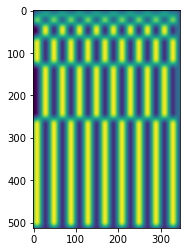

In [171]:
mask_generator = split_into_bands_log(is_dynamic=True)
test_mask(mask_generator)
sound1, sound2 = m2s_freq_split(sound, sample_rate, 10, mask_generator)
audio_mono_stereo(sound, sound1, sound2, sample_rate)

stereo:


mono:


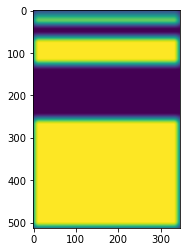

In [172]:
mask_generator = split_into_bands_log(is_dynamic=False)
test_mask(mask_generator)
sound1, sound2 = m2s_freq_split(sound, sample_rate, 10, mask_generator )
audio_mono_stereo(sound, sound1, sound2, sample_rate)

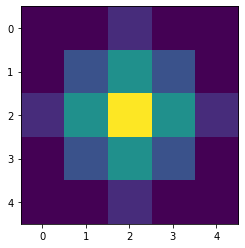

In [125]:
plt.imshow(weights)

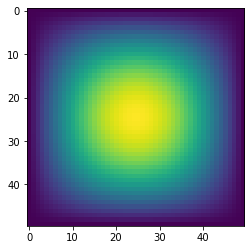

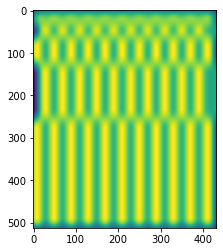

In [142]:

# weights = np.array([[0, 0, 1, 0, 0],
#                     [0, 2, 4, 2, 0],
#                     [1, 4, 8, 4, 1],
#                     [0, 2, 4, 2, 0],
#                     [0, 0, 1, 0, 0]],
#                    dtype=np.float)
# weights = weights / np.sum(weights[:])



In [123]:
ndfilters.convolve(mask, weights, mode='constant').shape

(513, 432)

In [112]:
sound1, sound2 = m2s_freq_split(sound, sample_rate, 10, split_into_bands_static)
audio_mono_stereo(sound, sound1, sound2, sample_rate)

stereo:


mono:


array([-7.38005385e-02, -8.72255936e-02, -6.95376561e-02, ...,
        1.09180456e-05,  1.15733248e-05,  8.20306750e-06])

In [99]:
(Zxx * mask).shape

(513, 432)

In [100]:
Zxx.shape

(513, 432)

In [27]:
mask.shape

(513, 346)

In [11]:
np.max(create_spectrogram(guitar_wd1, sample_rate, "phase")[0])

907.9202768874483

216.76989309769587

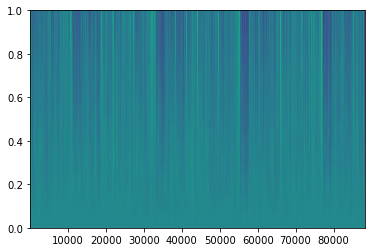

In [16]:
np.max(plt.specgram(guitar_wd1, mode="phase")[0])

NameError: name 'Zxx' is not defined

In [ ]:
plot_spectrogram(Sxx, NFFT, noverlap, Fs, freqs, t)

In [1]:
Zxx.shape

NameError: name 'Zxx' is not defined

In [11]:
len(f)

513

In [114]:
from scipy.ndimage.filters import gaussian_filter, fourier_uniform


ImportError: cannot import name 'fourier_uniform' from 'scipy.ndimage.filters' (C:\conda\envs\ds\lib\site-packages\scipy\ndimage\filters.py)

In [42]:
sound1, sound2 = m2s_freq_split(sound, sample_rate, 10, split_into_bands_static)
audio_mono_stereo(sound, sound1, sound2, sample_rate)

stereo:


mono:


In [12]:
from imports import *

In [64]:
song = guitar_sample

nperseg = 1024
noverlap = 512

f, t, Zxx = signal.stft(song, sample_rate, nperseg=nperseg, noverlap=noverlap)
# mask = split_into_bands(Zxx, 50)

mask = np.zeros_like(Zxx, dtype="float")
cnt = 0
g = 0
for i in range(len(mask)):
    if cnt == 25:
        cnt = 0
        g += 1
        
    mask[i, :] = g     
    cnt += 1

borders = []
last = 0
lastpos = -1

for i in range(len(mask)):
    if mask[i][0] != last:
        borders.append((lastpos + 1, i))
        last = mask[i][0]
        lastpos = i

mask1 = np.ones_like(mask)

for (left, right) in borders:
    mid = (left + right) // 2
    val = 0
    for j in range(left, mid + 1):
        mask1[j] *= val
#         print(val)
        val += 1 / (mid + 1 - left)

    for j in range(mid + 1, right  + 1):
        mask1[j] *= val
#         print(val)
        val -= 1 / (right - mid)
        
#     break
        
mask2 = np.ones_like(mask1) - mask1
    
# mask1 = mask % 2 == 0
# mask2 = mask % 2 == 1

# Zxx1[mask1] = 0
# Zxx2[mask2] = 0
#     #     for i in range(Zxx.shape[0]):

#     #         if i % 15 < 9:
#     #             Zxx1[i,:] = 0
#     #         else:
#     #             Zxx2[i,:] = 0
# _, sound1 = signal.istft(Zxx1, sample_rate, nperseg=nperseg, noverlap=noverlap)
# _, sound2 = signal.istft(Zxx2, sample_rate, nperseg=nperseg, noverlap=noverlap)

# return sound1, sound2

Zxx1 = Zxx * mask1
Zxx2 = Zxx * mask2

_, sound1 = signal.istft(Zxx1, sample_rate, nperseg=nperseg, noverlap=noverlap)
_, sound2 = signal.istft(Zxx2, sample_rate, nperseg=nperseg, noverlap=noverlap)


print("stereo:")
display(Audio([sound1, sound2], rate=guitar_sample_rate, autoplay=True, normalize=True))
print("mono:")
display(Audio(song, rate=sample_rate, autoplay=False, normalize=True))

stereo:


mono:


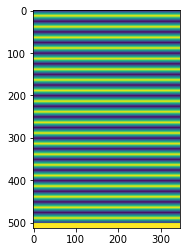

In [189]:
plt.imshow(mask1)

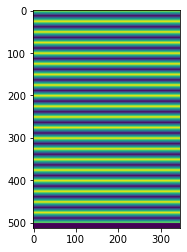

In [190]:
plt.imshow(mask2)

In [135]:
np.sum(np.abs(guitar_sample - sound1[:len(guitar_sample)]))

190.5133671797247

In [116]:
len(borders)

24

In [24]:

def plot_spec_image(Sxx, extent, vmin, vmax, log_scale=False):
    cmap = plt.cm.get_cmap("bwr")
    plt.imshow(Sxx, extent=extent, cmap=cmap, origin="upper", vmin=vmin, vmax=vmax)
    plt.gca().axis('auto')
    if log_scale:
        plt.yscale("log", base=10)
    plt.gca().invert_yaxis()
    plt.gca().minorticks_off()
    ticks = [100, 1000, 2000, 5000, 10000]
    plt.yticks(ticks, map(str, ticks))
    plt.ylim(50, 11000)
    
    
    
    
def plot_spectrogram(Sxx, NFFT, noverlap, Fs, freqs, t):
    %matplotlib widget
    Sxx = np.flipud(Sxx)
    max_per_row = np.max(np.abs(Sxx), axis=-1)[:, None]
    Sxx = np.divide(Sxx, max_per_row, out=np.zeros_like(Sxx), where=max_per_row!=0)
    Sxx /= np.max(Sxx)
    
    vmax = max(np.max(Sxx), np.min(Sxx))
    vmin = -vmax
    
    pad_xextent = (NFFT-noverlap) / Fs / 2
    xmin, xmax = np.min(t) - pad_xextent, np.max(t) + pad_xextent
    extent = xmin, xmax, freqs[0], freqs[-1]
    
    if vmin == vmax:
        vmin, vmax = -1, 1
    
    plot_spec_image(Sxx, extent, vmin, vmax)
    red_patch = mpatches.Patch(color='red', label='Left')
    blue_patch = mpatches.Patch(color='blue', label='Right')
    plt.legend(handles=[red_patch, blue_patch])
    

    
def visualize_stereo(sound1, sound2, sample_rate, cut=1):
    %matplotlib widget
    if cut:
        sound1 = sound1[:sample_rate * cut]
        sound2 = sound2[:sample_rate * cut]
    spec1, drawing_params = create_spectrogram(sound1, sample_rate)
    spec2, drawing_params = create_spectrogram(sound2, sample_rate)
    spec1 = np.log10(spec1 * 100 +1)
    spec2 = np.log10(spec2 * 100 + 1)
#     print(np.max(spec1 - spec2))
#     print(np.max(spec1))
    plot_spectrogram(spec1 - spec2, **drawing_params)
    
def vizualize_phase(sound1, sound2, sample_rate, cut=1):
    %matplotlib widget
    if cut:
        sound1 = sound1[:sample_rate * cut]
        sound2 = sound2[:sample_rate * cut]
    spec1, drawing_params = create_spectrogram(sound1, sample_rate)
    spec2, drawing_params = create_spectrogram(sound2, sample_rate)
    plot_spectrogram(spec1, **drawing_params)
    plot_spectrogram(spec2, **drawing_params)
#     plot_spectrogram(np.abs(spec1-spec2), **drawing_params) 
    
    
# умножить разность в фазе на амплитуду, чтобы занулить бесполезные частоты
visualize_stereo(sound1, sound2, jazz_sample_rate, cut=3)

TypeError: create_spectrogram() missing 1 required positional argument: 'mode'